In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "../../data"
os.listdir(data_dir)

['bus_stops_wszone.dbf',
 'bus_stops_wszone.shp',
 'singstat',
 'origin_destination_bus_202001_scaleddown.csv.xz',
 'net_202001_weekendb.net',
 'OD_bus',
 'net_202001_weekdayb.net',
 'train_station_wszone.prj',
 'origin_destination_train_202001.csv.xz',
 'train_station_wszone.dbf',
 'OD_202001_weekend.csv.xz',
 'subzone_centroid.csv',
 'transport_node_bus_202001.csv',
 'train_station_wszone.cpg',
 'OD_PT',
 'train_station_wszone.shx',
 'planning-area-2014',
 'subzone_centroid_pos.json',
 '.ipynb_checkpoints',
 'origin_destination_bus_202001.csv.xz',
 'region-2014',
 'train_station_wszone.shp',
 'OD_train',
 'bus_stops_wszone.shx',
 'OD_202001_weekday.csv.xz',
 'bus_stops_wszone.prj',
 'subzone-2014',
 'bus_stops_wszone.cpg']

In [3]:
fp = os.path.join(data_dir, "origin_destination_bus_202001.csv.xz")
df = pd.read_csv(fp)
df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2020-01,WEEKENDS/HOLIDAY,16,BUS,4168,10051,80
1,2020-01,WEEKDAY,16,BUS,4168,10051,60
2,2020-01,WEEKENDS/HOLIDAY,14,BUS,80119,90079,80
3,2020-01,WEEKDAY,14,BUS,80119,90079,240
4,2020-01,WEEKDAY,17,BUS,20281,20141,260


In [4]:
fp2 = os.path.join(data_dir, "transport_node_bus_202001.csv")
df2 = pd.read_csv(fp2)
df2.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2020-01,WEEKENDS/HOLIDAY,6,BUS,67551,224,22
1,2020-01,WEEKDAY,6,BUS,67551,3922,122
2,2020-01,WEEKDAY,7,BUS,66541,648,364
3,2020-01,WEEKENDS/HOLIDAY,7,BUS,66541,127,109
4,2020-01,WEEKENDS/HOLIDAY,17,BUS,54209,736,325


In [5]:
df2_sum = df2.groupby(["DAY_TYPE"])["TOTAL_TAP_IN_VOLUME", "TOTAL_TAP_OUT_VOLUME"].sum()
df2_sum

,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
DAY_TYPE,,
WEEKDAY,86118202,86131051
WEEKENDS/HOLIDAY,30038402,30043784


In [6]:
df2_sum.loc["WEEKDAY"]/23

TOTAL_TAP_IN_VOLUME     3.744270e+06
TOTAL_TAP_OUT_VOLUME    3.744828e+06
Name: WEEKDAY, dtype: float64

In [7]:
df2_sum.loc["WEEKENDS/HOLIDAY"]/8

TOTAL_TAP_IN_VOLUME     3754800.25
TOTAL_TAP_OUT_VOLUME    3755473.00
Name: WEEKENDS/HOLIDAY, dtype: float64

In [8]:
df_sum = df.groupby(["DAY_TYPE"])["TOTAL_TRIPS"].sum()
df_sum

DAY_TYPE
WEEKDAY             1717672614
WEEKENDS/HOLIDAY     599115814
Name: TOTAL_TRIPS, dtype: int64

In [9]:
df_sum.loc["WEEKDAY"]/23

74681418.0

In [10]:
df_sum.loc["WEEKENDS/HOLIDAY"]/8

74889476.75

In [11]:
target_val_weekday = df2_sum.loc["WEEKDAY"]/23
target_val_weekday_ave = (target_val_weekday["TOTAL_TAP_IN_VOLUME"] + target_val_weekday["TOTAL_TAP_OUT_VOLUME"])/2.
large_val_weekday = df_sum.loc["WEEKDAY"]/23

scaling_weekday = target_val_weekday_ave / large_val_weekday
scaling_weekday

0.05014030368653243

In [12]:
target_val_weekend = df2_sum.loc["WEEKENDS/HOLIDAY"]/8
target_val_weekend_ave = (target_val_weekend["TOTAL_TAP_IN_VOLUME"] + target_val_weekend["TOTAL_TAP_OUT_VOLUME"])/2.
large_val_weekend = df_sum.loc["WEEKENDS/HOLIDAY"]/8

scaling_weekend = target_val_weekend_ave / large_val_weekend
scaling_weekend

0.050142380317806136

In [13]:
df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2020-01,WEEKENDS/HOLIDAY,16,BUS,4168,10051,80
1,2020-01,WEEKDAY,16,BUS,4168,10051,60
2,2020-01,WEEKENDS/HOLIDAY,14,BUS,80119,90079,80
3,2020-01,WEEKDAY,14,BUS,80119,90079,240
4,2020-01,WEEKDAY,17,BUS,20281,20141,260


In [14]:
df_weekday = df[df["DAY_TYPE"]=="WEEKDAY"]
df_weekend = df[df["DAY_TYPE"]=="WEEKENDS/HOLIDAY"]

In [15]:
df_weekday["TOTAL_TRIPS_scl"] = df_weekday["TOTAL_TRIPS"] * scaling_weekday
df_weekday.head()

/home/benny/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,TOTAL_TRIPS_scl
1,2020-01,WEEKDAY,16,BUS,4168,10051,60,3.008418
3,2020-01,WEEKDAY,14,BUS,80119,90079,240,12.033673
4,2020-01,WEEKDAY,17,BUS,20281,20141,260,13.036479
6,2020-01,WEEKDAY,7,BUS,19051,10017,20,1.002806
8,2020-01,WEEKDAY,14,BUS,81049,70161,40,2.005612


In [18]:
df_weekend["TOTAL_TRIPS_scl"] = df_weekend["TOTAL_TRIPS"] * scaling_weekend
df_weekend.head()

/home/benny/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,TOTAL_TRIPS_scl
0,2020-01,WEEKENDS/HOLIDAY,16,BUS,4168,10051,80,4.011390
2,2020-01,WEEKENDS/HOLIDAY,14,BUS,80119,90079,80,4.011390
5,2020-01,WEEKENDS/HOLIDAY,17,BUS,20281,20141,40,2.005695
7,2020-01,WEEKENDS/HOLIDAY,17,BUS,11169,4219,18,0.902563
9,2020-01,WEEKENDS/HOLIDAY,14,BUS,81049,70161,20,1.002848


In [23]:
df_weekday["TOTAL_TRIPS_scl"].sum()/23, target_val_weekday_ave

(3744548.9782608678, 3744548.9782608696)

In [24]:
df_weekend["TOTAL_TRIPS_scl"].sum()/8, target_val_weekend_ave

(3755136.6250000014, 3755136.625)

In [44]:
temp1 = pd.DataFrame(df_weekday.groupby(["ORIGIN_PT_CODE", "DESTINATION_PT_CODE"])["TOTAL_TRIPS", "TOTAL_TRIPS_scl"].sum())

In [45]:
temp1["TOTAL_TRIPS_scl_day"] = temp1["TOTAL_TRIPS_scl"]/23
temp1["TOTAL_TRIPS_day"] = temp1["TOTAL_TRIPS"]/23

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


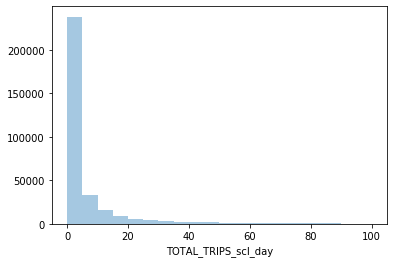

In [43]:
bins = bins=[ i*5 for i in range(21) ]
print(bins)
sns.distplot(temp1["TOTAL_TRIPS_scl_day"], bins=bins, kde=False)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


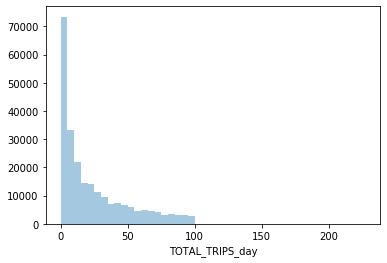

In [46]:
bins = bins=[ i*5 for i in range(21) ]
print(bins)
sns.distplot(temp1["TOTAL_TRIPS_day"], bins=bins, kde=False)

In [19]:
df_new = df_weekday
df_new = df_new.append(df_weekend)

In [34]:
df_new.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,TOTAL_TRIPS_scl
1,2020-01,WEEKDAY,16,BUS,4168,10051,60,3.008418
3,2020-01,WEEKDAY,14,BUS,80119,90079,240,12.033673
4,2020-01,WEEKDAY,17,BUS,20281,20141,260,13.036479
6,2020-01,WEEKDAY,7,BUS,19051,10017,20,1.002806
8,2020-01,WEEKDAY,14,BUS,81049,70161,40,2.005612


In [35]:
df_new = df_new[[ col for col in df_new if not(col=="TOTAL_TRIPS")]]
df_new.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS_scl
1,2020-01,WEEKDAY,16,BUS,4168,10051,3.008418
3,2020-01,WEEKDAY,14,BUS,80119,90079,12.033673
4,2020-01,WEEKDAY,17,BUS,20281,20141,13.036479
6,2020-01,WEEKDAY,7,BUS,19051,10017,1.002806
8,2020-01,WEEKDAY,14,BUS,81049,70161,2.005612


In [36]:
df_new = df_new.rename(columns={"TOTAL_TRIPS_scl": "TOTAL_TRIPS"})
df_new.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
1,2020-01,WEEKDAY,16,BUS,4168,10051,3.008418
3,2020-01,WEEKDAY,14,BUS,80119,90079,12.033673
4,2020-01,WEEKDAY,17,BUS,20281,20141,13.036479
6,2020-01,WEEKDAY,7,BUS,19051,10017,1.002806
8,2020-01,WEEKDAY,14,BUS,81049,70161,2.005612


In [37]:
fp_new = os.path.join(data_dir, "origin_destination_bus_202001_scaleddown.csv.xz")
df_new.to_csv(fp_new)

In [38]:
len(df), len(df_new)

(6835012, 6835012)